In [1]:
# Import additional packages that provide useful functions
# Get the packages support to make http requests
import urllib3
import time
import matplotlib.pyplot as plt


In [2]:
def getcheerlights():
    """gets the latest cheerlights color and return the RGB value"""
    colorcodes={"red":"#FF0000","green":"#008000","blue":"#0000FF","cyan":"00FFFF",
            "white":"#FFFFFF","warmwhite":"#FDF5E6","oldlace":"#FDF5E6",
            "purple":"#800080","magenta":"#FF00FF","yellow":"#FFFF00",
            "orange":"FFA500","pink":"#FFC0CB"}
    cheerlights_url="http://api.thingspeak.com/channels/1417/field/2/last.txt"
    result="#AAAAAA"
    try: 
        http = urllib3.PoolManager()
        r = http.request('GET', cheerlights_url)
        result=r.data.decode('utf-8') # returns a dictionary 
        # find our key from value (clumsy but it works)
        for key,val in colorcodes.items():
            if val==result:
                colorname=key
            else:
                colorname="RGB-levels"
        timestamp=time.ctime()
        print (timestamp+":"+" color via Twitter @cheerlights :"+
            colorname+" ("+str(result)+")")
    except urllib.error.URLError as e:
        print("Error while reading data from URL")
        print(e.reason)
        print("exit loop gracefully!")
    return result

In [3]:
test=getcheerlights()

Wed Jan 26 19:37:19 2022: color via Twitter @cheerlights :RGB-levels (#00ffff)


Wed Jan 26 19:37:23 2022: color via Twitter @cheerlights :RGB-levels (#00ffff)
#00ffff


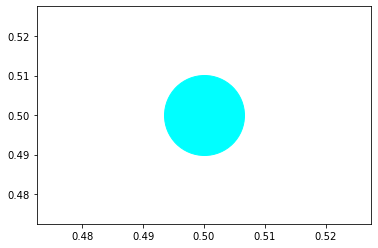

In [4]:
x=0.5
y=0.5
size=1
col=getcheerlights()
print(col)
plt.plot(x,y,'o',markersize=80,color=col)
plt.show()
